# 공통 주요 변수 찾기
1. OLS regression 제외 9개의 모델에서 중요하다고 선정된 상위 20개의 피쳐들로 리스트 생성
    - pearson_top20
    - spearman_top20
    - kendall_top20
    - feature_importance_top20
    - permutation_importance_top20
    - OLS_columns
    - f_regression_top20
    - lasso_top20
    - ridge_top20
    - elasticnet_top20
    - forward_top20
    - backward_top20
    - stepwise_top20
2. 9개의 리스트 중 n개의 리스트에 공통으로 존재하는 features만을 출력

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df_robust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KUBIG/23-2 KDIS 장기 프로젝트 분반/df_robust')

# Features와 Target 분리
X = df_robust.drop(columns=['Country Code', 'Year', 'Y'])
y = df_robust['Y']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

def evaluate_RFmodel(columns):
    features = df_robust[columns]
    target = df_robust['Y']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'<Random Forest Regressor 학습 성능>\n')
    print('MAE : {:.6f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE : {:.6f}'.format(mean_squared_error(y_test, y_pred)))
    print('R2 : {:.6f}'.format(r2_score(y_test, y_pred)))
    print('\n')

def evaluate_LRmodel(columns):
    features = df_robust[columns]
    target = df_robust['Y']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'<Linear Regression 학습 성능>\n')
    print('MAE : {:.6f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE : {:.6f}'.format(mean_squared_error(y_test, y_pred)))
    print('R2 : {:.6f}'.format(r2_score(y_test, y_pred)))

## 7개 이상의 리스트에 등장하는 공통 주요 변수

In [ ]:
from collections import Counter

#총 13개의 리스트
all_words = (pearson_top20 + spearman_top20 + kendall_top20 + feature_importance_top20 +
             permutation_importance_top20 + OLS_columns + f_regression_top20 +
             lasso_top20 + ridge_top20 + elasticnet_top20 + forward_top20 +
             backward_top20 + stepwise_top20)

word_count = Counter(all_words)

# 7개 이상의 리스트에 등장하는 단어 찾기
common_words = [word for word, count in word_count.items() if count >= 7]
print(len(common_words))
common_words

17


['Military spending',
 'R&D spending',
 'Medium and high-tech exports (% manufactured exports)',
 'Average wages',
 'Maternal mortality ratio',
 'GNI per capita',
 'Old-age dependency ratio',
 'Business extent of disclosure index (0-10)',
 'Population ages 15-64 (% of total population)',
 'Tax revenue (% of GDP)',
 'Merchandise trade (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Trade',
 'Life expectancy at 65',
 'Survival to 65_male',
 'Population density',
 'General government spending']

In [ ]:
#총 17개 단어들로 다시 모델 돌려보기
evaluate_RFmodel(common_words)
evaluate_LRmodel(common_words)

<Random Forest Regressor 학습 성능>

MAE : 748.884917
MSE : 1939763.955831
R2 : 0.972839


<Linear Regression 학습 성능>

MAE : 2767.917594
MSE : 14103338.723878
R2 : 0.802521


In [ ]:
# 모든 모델의 상위 3개 feature는 common_words에 들어가도록 함
# Gini index, Survival to 65_female, Agriculture, forestry, and fishing, value added (% of GDP), Life expectancy at birth
# common_words에 변수 네개 추가하여 다시 모델 돌려봄
common_words = [word for word, count in word_count.items() if count >= 7]
common_words = common_words + ['Gini index', 'Survival to 65_female', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Life expectancy at birth']

evaluate_RFmodel(common_words)
evaluate_LRmodel(common_words)
#랜덤 포레스트와 리니어 리그레션 둘다에서 가장 안정적인 성능을 내는 것으로 보임

<Random Forest Regressor 학습 성능>

MAE : 731.687575
MSE : 1879757.896062
R2 : 0.973679


<Linear Regression 학습 성능>

MAE : 2512.178080
MSE : 12486817.776605
R2 : 0.825156


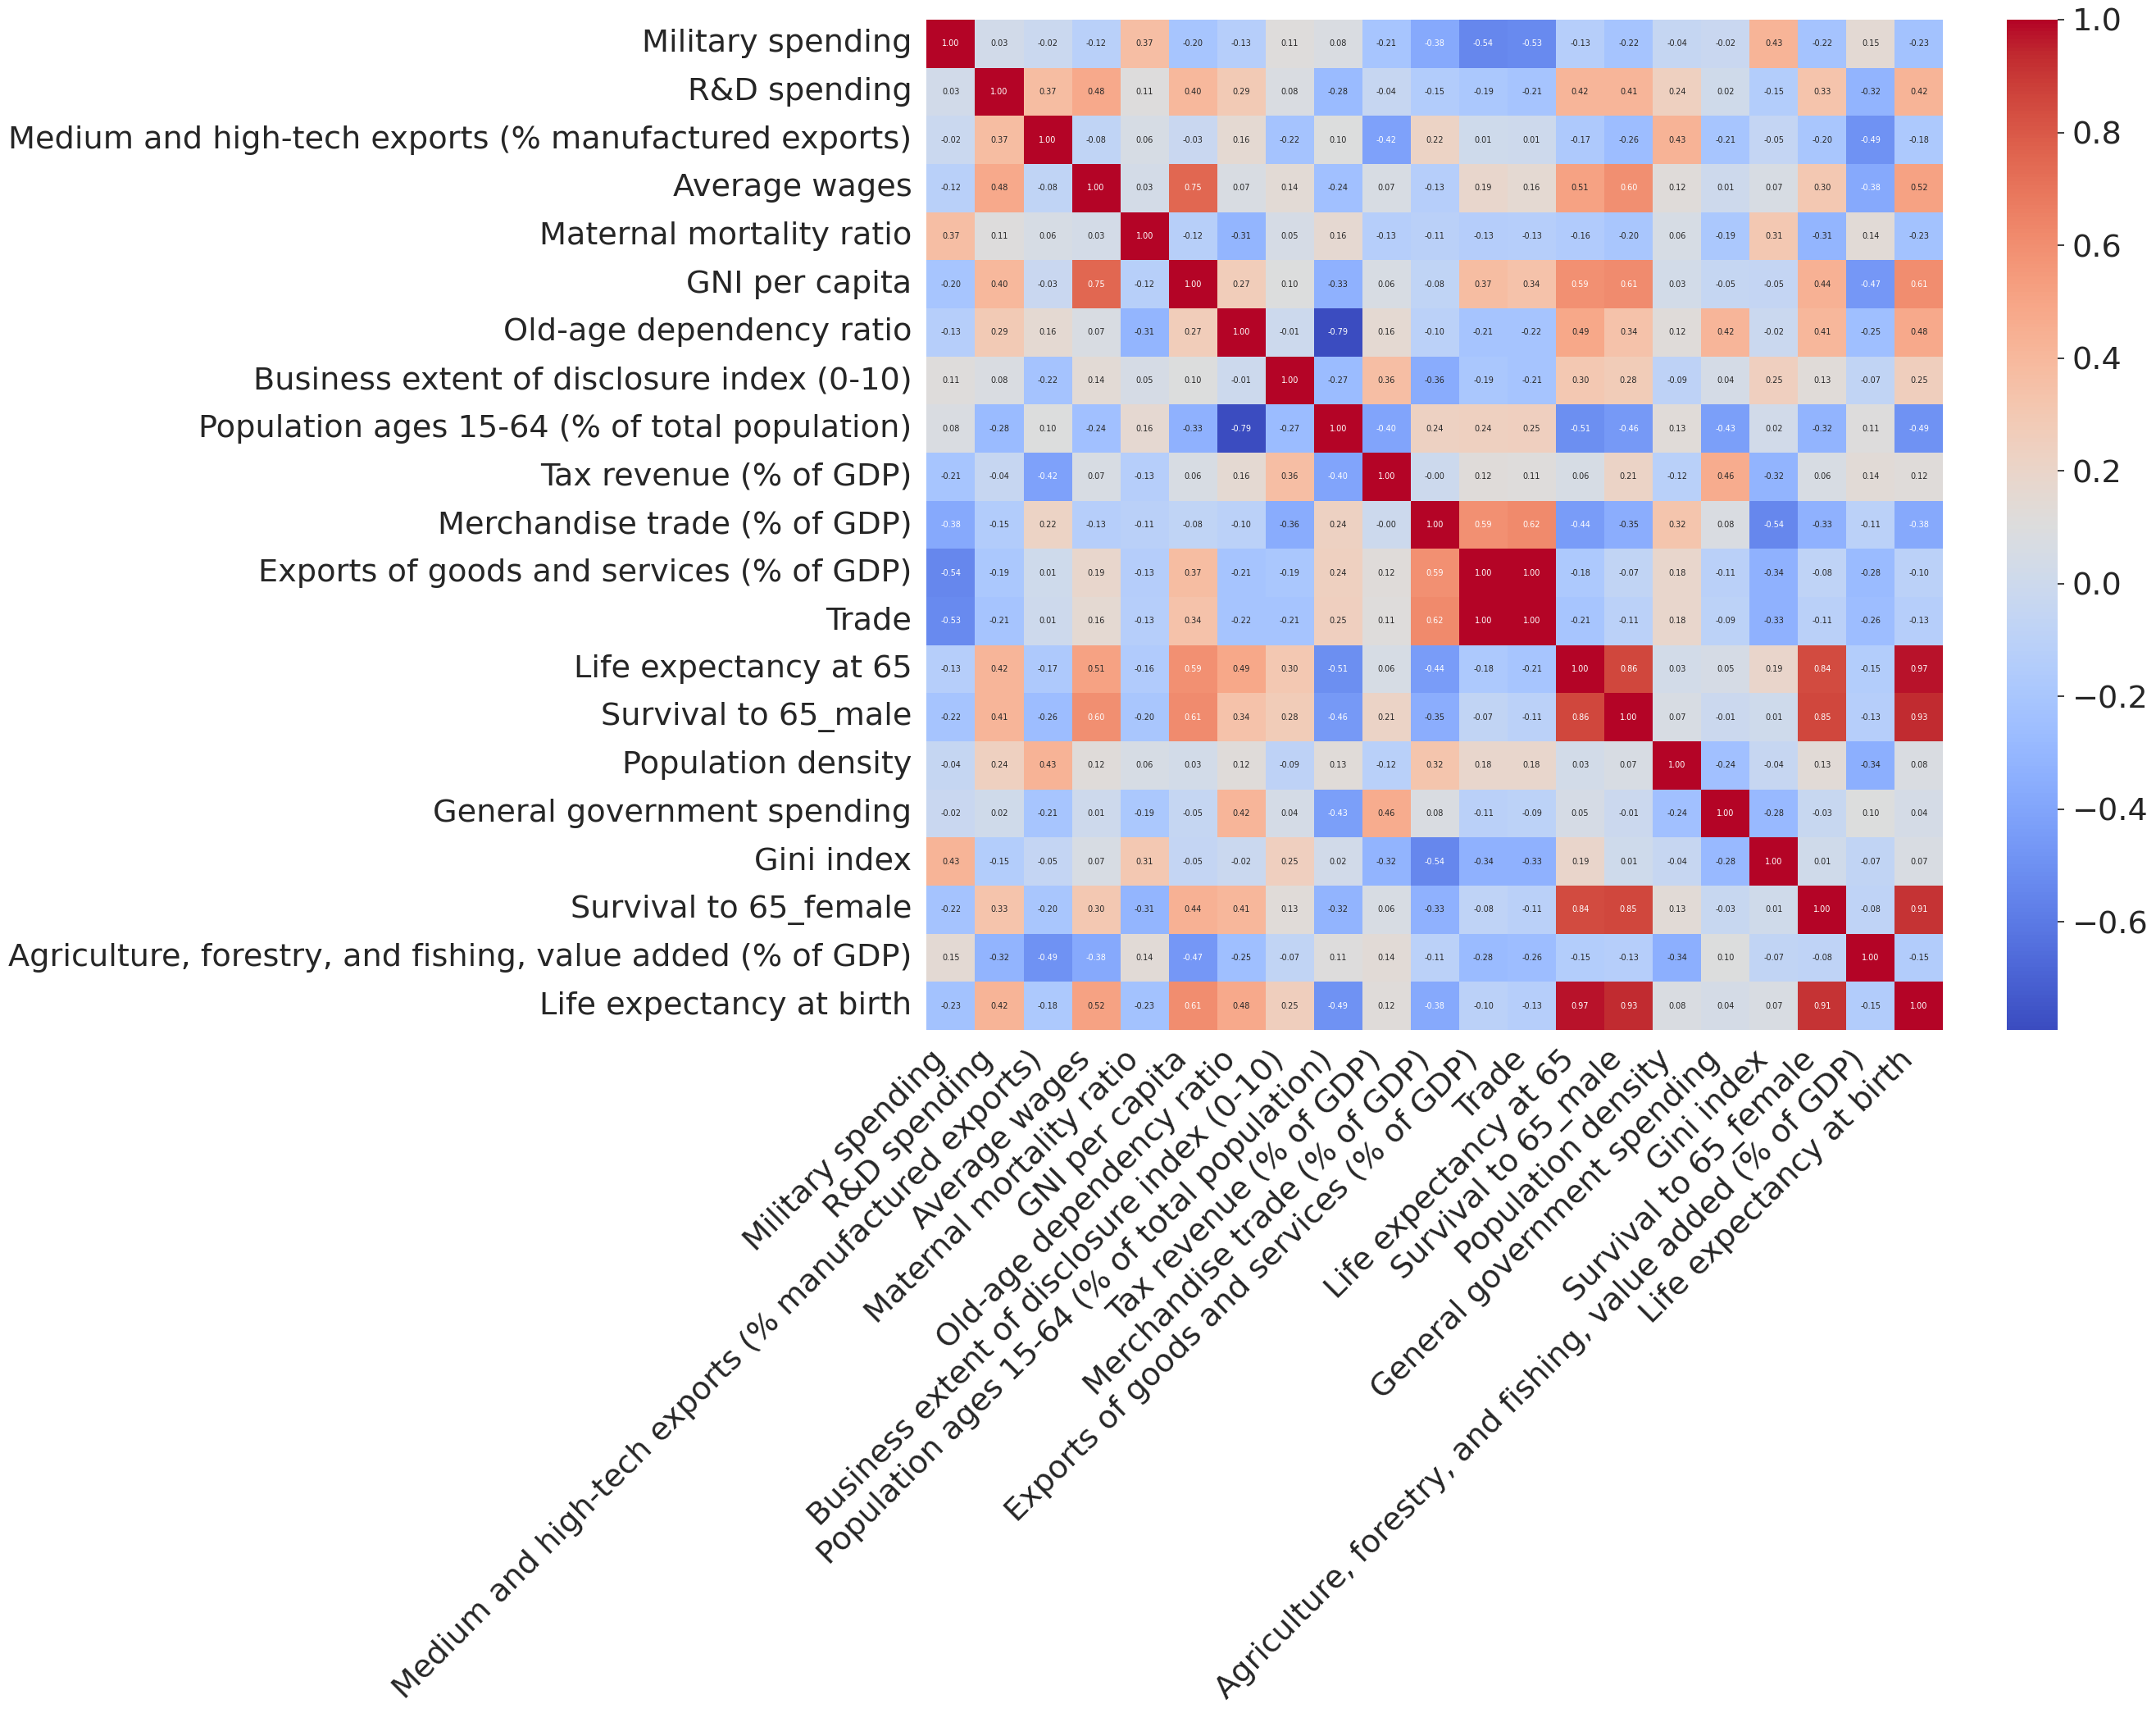

In [ ]:
# 변수간 다중공선성이 있는지 확인하기 위해 common_words의 21개 변수간 히트맵을 그려봄
selected_data = df_robust[common_words]

plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(selected_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 7})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')  # 컬럼명 회전
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')  # 행 이름 회전
plt.show()

- 총 8쌍의 변수가 상관관계가 0.7이상
    - Exports of goods and services (% of GDP) & Trade: 0.997
    - Life expectancy at 65 & Life expectancy at birth: 0.972
    - Life expectancy at birth & Survival to 65_male: 0.933
    - Life expectancy at birth & Survival to 65_female: 0.909
    - Life expectancy at 65 & Survival to 65_male: 0.855
    - Survival to 65_female & Survival to 65_male: 0.854
    - Life expectancy at 65 & Survival to 65_female: 0.841
    - Average wages & GNI per capita: 0.752

In [ ]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

vif_dataframe = calculate_vif(selected_data)
#10보다 큰 VIF 값만 출력
high_vif = vif_dataframe[vif_dataframe['VIF'] > 10]

high_vif.reset_index(drop=True)

,feature,VIF
0,Exports of goods and services (% of GDP),361.073652
1,Trade,362.314247
2,Life expectancy at 65,115.269032
3,Survival to 65_male,47.765735
4,Survival to 65_female,16.859810
5,Life expectancy at birth,280.292254


In [ ]:
#하나씩 차례로 제거해보기로 함
common_words = [word for word, count in word_count.items() if count >= 7]
common_words = common_words + ['Gini index', 'Survival to 65_female', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Life expectancy at birth']

common_words.remove('Exports of goods and services (% of GDP)')
common_words.remove('Life expectancy at 65')
common_words.remove('Life expectancy at birth')
common_words.remove('Survival to 65_female')

evaluate_RFmodel(common_words)
evaluate_LRmodel(common_words)

<Random Forest Regressor 학습 성능>

MAE : 691.652719
MSE : 1720396.037297
R2 : 0.975911


<Linear Regression 학습 성능>

MAE : 2766.222597
MSE : 14125196.157935
R2 : 0.802215


In [ ]:
selected_data = df_robust[common_words]

vif_dataframe = calculate_vif(selected_data)
high_vif = vif_dataframe[vif_dataframe['VIF'] > 10]
high_vif.reset_index(drop=True)

,feature,VIF


In [ ]:
selected_data.shape
#21개 변수 -> 다중공선성 고려해서 4개 변수 제거한 17개로 확정

(613, 17)

##8개 이상의 리스트에 등장하는 공통 주요 변수

In [ ]:
all_words = (pearson_top20 + spearman_top20 + kendall_top20 + feature_importance_top20 +
             permutation_importance_top20 + OLS_columns + f_regression_top20 +
             lasso_top20 + ridge_top20 + elasticnet_top20 + forward_top20 +
             backward_top20 + stepwise_top20)

word_count = Counter(all_words)

# 8개 이상의 리스트에 등장하는 단어 찾기
common_words = [word for word, count in word_count.items() if count >= 8]
print(len(common_words))
common_words

10


['Military spending',
 'R&D spending',
 'Medium and high-tech exports (% manufactured exports)',
 'Average wages',
 'GNI per capita',
 'Old-age dependency ratio',
 'Business extent of disclosure index (0-10)',
 'Life expectancy at 65',
 'Survival to 65_male',
 'Population density']

In [ ]:
common_words = [word for word, count in word_count.items() if count >= 8]
common_words = common_words + ['Gini index', 'Survival to 65_female', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Life expectancy at birth', 'Trade', 'Tax revenue (% of GDP)', 'Exports of goods and services (% of GDP)']

evaluate_RFmodel(common_words)
evaluate_LRmodel(common_words)

<Random Forest Regressor 학습 성능>

MAE : 690.111950
MSE : 1820291.838382
R2 : 0.974512


<Linear Regression 학습 성능>

MAE : 2624.549071
MSE : 13241221.273340
R2 : 0.814592


In [ ]:
#하나씩 차례로 제거
common_words.remove('Exports of goods and services (% of GDP)')
common_words.remove('Life expectancy at 65')
common_words.remove('Life expectancy at birth')
common_words.remove('Survival to 65_male')

evaluate_RFmodel(common_words)
evaluate_LRmodel(common_words)

<Random Forest Regressor 학습 성능>

MAE : 656.079595
MSE : 1616683.213841
R2 : 0.977363


<Linear Regression 학습 성능>

MAE : 2877.670976
MSE : 14195226.363378
R2 : 0.801234


In [ ]:
selected_data = df_robust[common_words]

vif_dataframe = calculate_vif(selected_data)
high_vif = vif_dataframe[vif_dataframe['VIF'] > 10]
high_vif.reset_index(drop=True)

,feature,VIF


In [ ]:
selected_data.shape

(613, 13)

In [ ]:
# 첫번째(7개 이상의 리스트에 등장하는 공통 주요 변수 -> 13개 모델에서 뽑힌 상위 3위 변수 추가 -> 다중공선성 높은 변수 제거 -> 총 17개 변수 -> 성능 평가)
# 두번째(8개 이상의 리스트에 등장하는 공통 주요 변수 -> 13개 모델에서 뽑힌 상위 3위 변수 추가 -> 다중공선성 높은 변수 제거 -> 총 13개 변수 -> 성능 평가)

In [ ]:
selected_data.columns

Index(['Military spending', 'R&D spending',
       'Medium and high-tech exports (% manufactured exports)',
       'Average wages', 'GNI per capita', 'Old-age dependency ratio',
       'Business extent of disclosure index (0-10)', 'Population density',
       'Gini index', 'Survival to 65_female',
       'Agriculture, forestry, and fishing, value added (% of GDP)', 'Trade',
       'Tax revenue (% of GDP)'],
      dtype='object')